Hospital Readmissions Data Analysis and Recommendations for Reduction
Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

Exercise Directions
In this exercise, you will:

critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
construct a statistically sound analysis and make recommendations of your own
More instructions provided below. Include your work in this notebook and submit to your Github account.

Resources¶
Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


In [17]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.stats as stats
%matplotlib inline
import seaborn as sns
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

In [18]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

In [19]:
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


****
## Preliminary Analysis

In [20]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\muneerhz\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


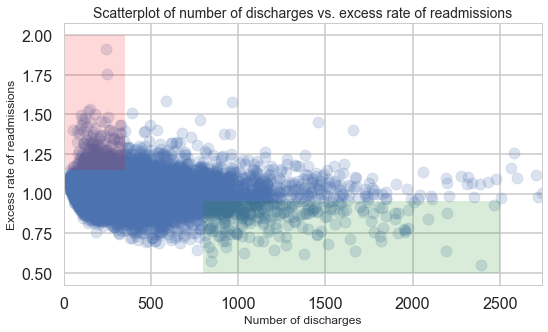

In [21]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()


****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

In [22]:
hospital_dropna_df = clean_hospital_read_df[np.isfinite(clean_hospital_read_df['Excess Readmission Ratio'])]

In [23]:
hospital_dropna_df

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,210035,MD,READM-30-AMI-HRRP,25,NaN,1.0914,26.8,24.6,12.0,07/01/2010,06/30/2013
1699,ATLANTIC GENERAL HOSPITAL,210061,MD,READM-30-AMI-HRRP,27,NaN,1.0961,24.8,22.6,12.0,07/01/2010,06/30/2013
1774,MERCY MEDICAL CENTER INC,210008,MD,READM-30-AMI-HRRP,28,NaN,1.0934,24.4,22.3,12.0,07/01/2010,06/30/2013
1853,KAISER FOUNDATION HOSPITAL-SANTA CLARA,50071,CA,READM-30-HF-HRRP,29,NaN,1.0908,21.0,19.3,11.0,07/01/2010,06/30/2013
1290,PALMERTON HOSPITAL,390019,PA,READM-30-AMI-HRRP,30,NaN,1.1123,23.2,20.9,13.0,07/01/2010,06/30/2013
1602,TENNOVA HEALTHCARE-JEFFERSON MEMORIAL HOSPITAL,440056,TN,READM-30-AMI-HRRP,31,NaN,1.0992,24.2,22.1,13.0,07/01/2010,06/30/2013
2048,FORT MADISON COMMUNITY HOSPITAL,160122,IA,READM-30-AMI-HRRP,33,NaN,1.0847,22.6,20.9,12.0,07/01/2010,06/30/2013
2441,ISLAND HOSPITAL,500007,WA,READM-30-AMI-HRRP,34,NaN,1.0738,20.8,19.3,11.0,07/01/2010,06/30/2013
2512,NORTH CENTRAL BRONX HOSPITAL,330385,NY,READM-30-HF-HRRP,34,NaN,1.0720,23.3,21.8,12.0,07/01/2010,06/30/2013
2825,KAISER FOUNDATION HOSPITAL FONTANA,50140,CA,READM-30-PN-HRRP,34,NaN,1.0651,20.7,19.4,11.0,07/01/2010,06/30/2013


****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

### A. Do you agree with the above analysis and recommendations? Why or why not?

I don't agree with the above the conclusions entirely because it is difficult to know if all the claims are substantiated. The conclusions are based on one plot and more analysis needs to be done in order to confirm if they are correct. 

### B. Provide support for your arguments and your own recommendations with a statistically sound analysis:
##### 1. Setup an appropriate hypothesis test.

Ho: There is no significant correlation between number of discharges and readmission rates

H1: There is significant correlation between number of discharges and readmission rates

#### 2. Compute and report the observed significance value (or p-value).

To calculate p-value, let's first calculate the degrees of freedom, the t-statistic and the pearson correlation coefficient to see if there is correlation between our two variables (number of discharges and readmission rate).

In [24]:
number_of_discharges = hospital_dropna_df['Number of Discharges']
excess_readmission_ratio = hospital_dropna_df['Excess Readmission Ratio'] 

pearson_r = np.corrcoef(number_of_discharges, excess_readmission_ratio)[0, 1]
pearson_r

-0.097397943510793533

In [25]:
#r-squared value
r_squared=pearson_r**2
r_squared

0.0094863594001317279

In [26]:
n1=11497
df1=n1-2
t1=(pearson_r*((n1-2)/(1-pearson_r**2))**0.5)
t1

-10.49238081342336

In [27]:
p_value1 = stats.t.sf(np.abs(t1), df1)*2
p_value1

1.2225473776734486e-25

The p-value is much smaller than 0.05, thus the null hypothesis can be rejected. Therefore, there is significant correlation between number of discharges and readmission rates and the pearson correlation is significant. It is negative number which means that although the correlation is significant, it is small, meaning discharges increasing won't necessarily increase readmission rates.

#### 3. Report statistical significance for  α  = .01.

If α  = .01, the p=value (which would be calculated the same way) is still much smaller than 0.05 which means that the results of this test would not change.

#### 4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

In this example, there is a difference between statistical significance and practical significance. The p-value shows that there is a statistically significant correlation between the number of discharges and the readmission rates. Meaning the correlation shown was not a product of sampling error, it is actually found in the dataset itself. 

Practically, however, is a different discussion, because while there is a correlation in the data (presence), it is not large enough to account for a significant relationship. In other words, just because a correlation is present doesn't mean it is large enough to have an effect.

I would not offer the recommendations noted above because of the small Pearson correlation value. It is a negative value and almost close to zero meaning that there is close to no correlation between the two variables.

#### 5. Look at the scatterplot above.
What are the advantages and disadvantages of using this plot to convey information?
Construct another plot that conveys the same information in a more direct manner.

Advantages: It is relatively easy to generate and a quick and intuitive way to see a relationship. It is a good first step in understanding a relationship that may be found in the data. 

Disadvantages: It is difficult to sort out which points have what readmission ratio.

In [32]:
#divide the sets to see the difference in excess readmission ratio more clearly
less_than=hospital_dropna_df[hospital_dropna_df['Excess Readmission Ratio']<=1]
greater_than=hospital_dropna_df[hospital_dropna_df['Excess Readmission Ratio']>1]

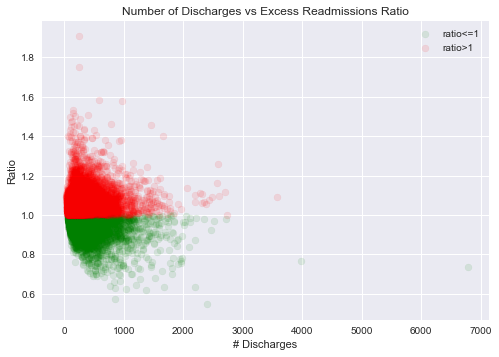

In [33]:
sns.set()
plt.scatter(less_than['Number of Discharges'], less_than['Excess Readmission Ratio'], c='g', label="ratio<=1", alpha=0.10)
plt.scatter(greater_than['Number of Discharges'], greater_than['Excess Readmission Ratio'], c='r', label='ratio>1', alpha=0.1)
plt.xlabel('# Discharges')
plt.ylabel('Ratio')
plt.title('Number of Discharges vs Excess Readmissions Ratio')
plt.legend()

Greens have a ratio that is acceptable, while red indicates that more patients are being readmitted to the hospital for heart attack, heart failure, and pneumonia than projected.